# Pandas 常用方法示例
本 Notebook 罗列了 Pandas 中大约 200 个常用方法或函数的最简示例。每个示例单独放在一个 cell 中，以便独立查看和运行。

**Tips：**
- 这些示例大多只演示基础用法；
- 部分方法有重复或相似功能，仅作快速参考；
- 在实际生产环境中，请结合官方文档与具体需求；
- 某些示例需要外部文件或数据库才能完整运行，示例中多为简单演示。

In [2]:
# 全局导入
import pandas as pd
import numpy as np
import datetime

# 在多数示例中，我们会用到以下 df 和 s:
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [4, 5, 6, 7, 8],
    'C': ["x", "x", "y", "y", "z"],
    'D': pd.date_range("2021-01-01", periods=5, freq="D")
})

s = pd.Series([10, 20, 30, 40, 50], name="S")

print("Initial df:\n", df)
print("\nInitial s:\n", s)

Initial df:
    A  B  C          D
0  1  4  x 2021-01-01
1  2  5  x 2021-01-02
2  3  6  y 2021-01-03
3  4  7  y 2021-01-04
4  5  8  z 2021-01-05

Initial s:
 0    10
1    20
2    30
3    40
4    50
Name: S, dtype: int64


## 1. 基础创建和导入导出

In [3]:
# 1. pd.Series
ser = pd.Series([10, 20, 30], index=["x", "y", "z"], name="ExampleSeries")
print(ser)

x    10
y    20
z    30
Name: ExampleSeries, dtype: int64


In [4]:
# 2. pd.DataFrame
df2 = pd.DataFrame({
    "col1": [1, 2, 3],
    "col2": [True, False, True],
    "col3": ["a", "b", "c"]
})
print(df2)

   col1   col2 col3
0     1   True    a
1     2  False    b
2     3   True    c


In [5]:
# 3. pd.read_csv (示例，仅打印函数用法)
print('pd.read_csv("path_to_file.csv") # 读取 CSV 文件到 DataFrame')

pd.read_csv("path_to_file.csv") # 读取 CSV 文件到 DataFrame


In [6]:
# 4. pd.read_excel (示例)
print('pd.read_excel("file.xlsx", sheet_name="Sheet1")')

pd.read_excel("file.xlsx", sheet_name="Sheet1")


In [7]:
# 5. pd.read_table
print('pd.read_table("data.txt", sep="\t")')

pd.read_table("data.txt", sep="	")


In [8]:
# 6. pd.read_json
print('pd.read_json("data.json")')

pd.read_json("data.json")


In [9]:
# 7. pd.read_html
print('dfs = pd.read_html("http://example.com")  # 返回 DataFrame 列表')

dfs = pd.read_html("http://example.com")  # 返回 DataFrame 列表


In [10]:
# 8. pd.read_sql (示例)
print('pd.read_sql("SELECT * FROM table", con=some_db_connection)')

pd.read_sql("SELECT * FROM table", con=some_db_connection)


In [11]:
# 9. DataFrame.to_csv
df.to_csv("out.csv", index=False)
print('导出 df 为 CSV: out.csv (index=False)')

导出 df 为 CSV: out.csv (index=False)


In [12]:
# Install openpyxl package
# %pip install openpyxl

# 10. DataFrame.to_excel
df.to_excel("out.xlsx", sheet_name="Sheet1", index=False)
print('导出 df 为 Excel: out.xlsx')

导出 df 为 Excel: out.xlsx


In [13]:
# 11. DataFrame.to_json
json_str = df.to_json(orient="records")
print(json_str)

[{"A":1,"B":4,"C":"x","D":1609459200000},{"A":2,"B":5,"C":"x","D":1609545600000},{"A":3,"B":6,"C":"y","D":1609632000000},{"A":4,"B":7,"C":"y","D":1609718400000},{"A":5,"B":8,"C":"z","D":1609804800000}]


In [14]:
# 12. DataFrame.to_sql (示例)
print("df.to_sql('table_name', con=connection, if_exists='replace')")

df.to_sql('table_name', con=connection, if_exists='replace')


## 2. 查看数据与基本信息

In [15]:
# 13. DataFrame.head
print(df.head(3))

   A  B  C          D
0  1  4  x 2021-01-01
1  2  5  x 2021-01-02
2  3  6  y 2021-01-03


In [16]:
# 14. DataFrame.tail
print(df.tail(2))

   A  B  C          D
3  4  7  y 2021-01-04
4  5  8  z 2021-01-05


In [17]:
# 15. DataFrame.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       5 non-null      int64         
 1   B       5 non-null      int64         
 2   C       5 non-null      object        
 3   D       5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 292.0+ bytes


In [18]:
# 16. DataFrame.describe
print(df.describe())

              A         B                    D
count  5.000000  5.000000                    5
mean   3.000000  6.000000  2021-01-03 00:00:00
min    1.000000  4.000000  2021-01-01 00:00:00
25%    2.000000  5.000000  2021-01-02 00:00:00
50%    3.000000  6.000000  2021-01-03 00:00:00
75%    4.000000  7.000000  2021-01-04 00:00:00
max    5.000000  8.000000  2021-01-05 00:00:00
std    1.581139  1.581139                  NaN


In [19]:
# 17. DataFrame.shape
print(df.shape)

(5, 4)


In [20]:
# 18. DataFrame.index
print(df.index)

RangeIndex(start=0, stop=5, step=1)


In [21]:
# 19. DataFrame.columns
print(df.columns)

Index(['A', 'B', 'C', 'D'], dtype='object')


In [22]:
# 20. DataFrame.values
print(df.values)

[[1 4 'x' Timestamp('2021-01-01 00:00:00')]
 [2 5 'x' Timestamp('2021-01-02 00:00:00')]
 [3 6 'y' Timestamp('2021-01-03 00:00:00')]
 [4 7 'y' Timestamp('2021-01-04 00:00:00')]
 [5 8 'z' Timestamp('2021-01-05 00:00:00')]]


In [23]:
# 21. DataFrame.dtypes
print(df.dtypes)

A             int64
B             int64
C            object
D    datetime64[ns]
dtype: object


In [24]:
# 22. DataFrame.select_dtypes
df_num = df.select_dtypes(include=[np.number])
print(df_num)

   A  B
0  1  4
1  2  5
2  3  6
3  4  7
4  5  8


In [25]:
# 23. DataFrame.astype
df_new = df.astype({'A': 'float'})
print(df_new.dtypes)

A           float64
B             int64
C            object
D    datetime64[ns]
dtype: object


In [26]:
# 24. DataFrame.copy
df_copy = df.copy()
df_copy['A'] = df_copy['A']*10
print("df\n", df)
print("df_copy\n", df_copy)

df
    A  B  C          D
0  1  4  x 2021-01-01
1  2  5  x 2021-01-02
2  3  6  y 2021-01-03
3  4  7  y 2021-01-04
4  5  8  z 2021-01-05
df_copy
     A  B  C          D
0  10  4  x 2021-01-01
1  20  5  x 2021-01-02
2  30  6  y 2021-01-03
3  40  7  y 2021-01-04
4  50  8  z 2021-01-05


## 3. 缺失值处理

In [27]:
# 25. DataFrame.isna
print(df.isna())

       A      B      C      D
0  False  False  False  False
1  False  False  False  False
2  False  False  False  False
3  False  False  False  False
4  False  False  False  False


In [28]:
# 26. DataFrame.notna
print(df.notna())

      A     B     C     D
0  True  True  True  True
1  True  True  True  True
2  True  True  True  True
3  True  True  True  True
4  True  True  True  True


In [29]:
# 27. DataFrame.dropna
df_na = pd.DataFrame({
  'A': [1, np.nan, 3],
  'B': [4, 5, np.nan]
})
print(df_na.dropna())

     A    B
0  1.0  4.0


In [30]:
# 28. DataFrame.fillna
print(df_na.fillna(0))

     A    B
0  1.0  4.0
1  0.0  5.0
2  3.0  0.0


In [31]:
# 29. DataFrame.replace
df_replace = pd.DataFrame({'col1':[1,2,999,4], 'col2':[999,3,4,999]})
print(df_replace.replace(999, np.nan))

   col1  col2
0   1.0   NaN
1   2.0   3.0
2   NaN   4.0
3   4.0   NaN


## 4. 重复值与去重

In [32]:
# 30. DataFrame.duplicated
df_dup = pd.DataFrame({
    'X': [1,1,2,2,3],
    'Y': [10,10,20,21,30]
})
print(df_dup.duplicated())

0    False
1     True
2    False
3    False
4    False
dtype: bool


In [33]:
# 31. DataFrame.drop_duplicates
print(df_dup.drop_duplicates())

   X   Y
0  1  10
2  2  20
3  2  21
4  3  30


## 5. 重命名与排序

In [34]:
# 32. DataFrame.rename
df_rename = df.rename(columns={'A': 'A_new'})
print(df_rename.head())

   A_new  B  C          D
0      1  4  x 2021-01-01
1      2  5  x 2021-01-02
2      3  6  y 2021-01-03
3      4  7  y 2021-01-04
4      5  8  z 2021-01-05


In [35]:
# 33. DataFrame.sort_values
print(df.sort_values(by='B', ascending=False))

   A  B  C          D
4  5  8  z 2021-01-05
3  4  7  y 2021-01-04
2  3  6  y 2021-01-03
1  2  5  x 2021-01-02
0  1  4  x 2021-01-01


In [36]:
# 34. DataFrame.sort_index
df_sort_idx = df.sample(frac=1, random_state=1)  # 打乱
print(df_sort_idx.sort_index())

   A  B  C          D
0  1  4  x 2021-01-01
1  2  5  x 2021-01-02
2  3  6  y 2021-01-03
3  4  7  y 2021-01-04
4  5  8  z 2021-01-05


In [37]:
# 35. DataFrame.reset_index
df_reset = df_sort_idx.reset_index(drop=True)
print(df_reset)

   A  B  C          D
0  3  6  y 2021-01-03
1  2  5  x 2021-01-02
2  5  8  z 2021-01-05
3  1  4  x 2021-01-01
4  4  7  y 2021-01-04


In [38]:
# 36. DataFrame.set_index
df_set = df.set_index('C')
print(df_set)

   A  B          D
C                 
x  1  4 2021-01-01
x  2  5 2021-01-02
y  3  6 2021-01-03
y  4  7 2021-01-04
z  5  8 2021-01-05


## 6. 索引与选择数据

In [39]:
# 37. DataFrame.loc
print(df.loc[0:2, ['A','C']])

   A  C
0  1  x
1  2  x
2  3  y


In [40]:
# 38. DataFrame.iloc
print(df.iloc[1:3, 0:2])

   A  B
1  2  5
2  3  6


In [41]:
# 39. DataFrame.at (基于标签的快速定位)
print(df.at[0, 'A'])

1


In [42]:
# 40. DataFrame.iat (基于整数位置)
print(df.iat[0, 1])

4


In [43]:
# 41. DataFrame.query
df_query = df.query("A > 2 and B < 8")
print(df_query)

   A  B  C          D
2  3  6  y 2021-01-03
3  4  7  y 2021-01-04


In [44]:
# 42. DataFrame.eval
df_eval = df.eval("E = A + B")
print(df_eval)

   A  B  C          D   E
0  1  4  x 2021-01-01   5
1  2  5  x 2021-01-02   7
2  3  6  y 2021-01-03   9
3  4  7  y 2021-01-04  11
4  5  8  z 2021-01-05  13


In [45]:
# 43. DataFrame.assign
df_assign = df.assign(AA = df['A']*10)
print(df_assign)

   A  B  C          D  AA
0  1  4  x 2021-01-01  10
1  2  5  x 2021-01-02  20
2  3  6  y 2021-01-03  30
3  4  7  y 2021-01-04  40
4  5  8  z 2021-01-05  50


In [46]:
# 44. DataFrame.apply
print(df[['A','B']].apply(np.mean))

A    3.0
B    6.0
dtype: float64


In [47]:
# 45. DataFrame.applymap
df_str = df[['A','B']].applymap(lambda x: f"val_{x}")
print(df_str)

       A      B
0  val_1  val_4
1  val_2  val_5
2  val_3  val_6
3  val_4  val_7
4  val_5  val_8


C:\Users\minqliu\AppData\Local\Temp\ipykernel_39108\1386170597.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_str = df[['A','B']].applymap(lambda x: f"val_{x}")


In [48]:
# 46. DataFrame.aggregate / agg
print(df[['A','B']].agg(['min','max','mean']))

        A    B
min   1.0  4.0
max   5.0  8.0
mean  3.0  6.0


In [49]:
# 47. DataFrame.transform
print(df[['A','B']].transform(lambda x: x+10))

    A   B
0  11  14
1  12  15
2  13  16
3  14  17
4  15  18


## 7. 分组与透视

In [50]:
# 48. DataFrame.groupby
grouped = df.groupby('C')
print(grouped['A'].sum())

C
x    3
y    7
z    5
Name: A, dtype: int64


In [51]:
# 49. DataFrame.pivot
df_pivot = pd.DataFrame({
    'foo': ['one','one','two','two'],
    'bar': ['A','B','A','B'],
    'val': [1,2,3,4]
})
print(df_pivot.pivot(index='foo', columns='bar', values='val'))

bar  A  B
foo      
one  1  2
two  3  4


In [52]:
# 50. DataFrame.pivot_table
df_pivot_table = pd.DataFrame({
    'A': ['foo','foo','bar','bar'],
    'B': ['one','two','one','two'],
    'C': [1,2,3,4]
})
pt = df_pivot_table.pivot_table(index='A', columns='B', values='C', aggfunc='sum')
print(pt)

B    one  two
A            
bar    3    4
foo    1    2


In [53]:
# 51. DataFrame.melt
df_melt = pd.melt(df, id_vars=['C'], value_vars=['A','B'])
print(df_melt)

   C variable  value
0  x        A      1
1  x        A      2
2  y        A      3
3  y        A      4
4  z        A      5
5  x        B      4
6  x        B      5
7  y        B      6
8  y        B      7
9  z        B      8


In [54]:
# 52. DataFrame.stack
df_stacked = df.stack()
print(df_stacked)

0  A                      1
   B                      4
   C                      x
   D    2021-01-01 00:00:00
1  A                      2
   B                      5
   C                      x
   D    2021-01-02 00:00:00
2  A                      3
   B                      6
   C                      y
   D    2021-01-03 00:00:00
3  A                      4
   B                      7
   C                      y
   D    2021-01-04 00:00:00
4  A                      5
   B                      8
   C                      z
   D    2021-01-05 00:00:00
dtype: object


In [55]:
# 53. DataFrame.unstack
print(df_stacked.unstack())

   A  B  C                    D
0  1  4  x  2021-01-01 00:00:00
1  2  5  x  2021-01-02 00:00:00
2  3  6  y  2021-01-03 00:00:00
3  4  7  y  2021-01-04 00:00:00
4  5  8  z  2021-01-05 00:00:00


In [56]:
# 54. DataFrame.merge
df_left = pd.DataFrame({'key':[1,2,3], 'left_val':[10,20,30]})
df_right = pd.DataFrame({'key':[2,3,4], 'right_val':[200,300,400]})
df_merged = pd.merge(df_left, df_right, on='key', how='inner')
print(df_merged)

   key  left_val  right_val
0    2        20        200
1    3        30        300


In [57]:
# 55. DataFrame.join
df_left2 = df_left.set_index('key')
df_right2 = df_right.set_index('key')
df_joined = df_left2.join(df_right2, how='inner')
print(df_joined)

     left_val  right_val
key                     
2          20        200
3          30        300


In [58]:
# 56. pd.concat
df_a = pd.DataFrame({'col':[1,2]})
df_b = pd.DataFrame({'col':[3,4]})
df_cat = pd.concat([df_a, df_b], ignore_index=True)
print(df_cat)

   col
0    1
1    2
2    3
3    4


In [59]:
# 57. DataFrame.combine_first
df1 = pd.DataFrame({'A':[1,np.nan], 'B':[3,4]})
df2 = pd.DataFrame({'A':[5,6]})
df_combined = df1.combine_first(df2)
print(df_combined)

     A  B
0  1.0  3
1  6.0  4


In [60]:
# 58. DataFrame.align
df3 = pd.DataFrame({'X':[10,20], 'Y':[30,40]}, index=[0,1])
df4 = pd.DataFrame({'X':[100,200,300]}, index=[1,2,3])
left, right = df3.align(df4, join='outer')
print('left:\n', left)
print('\nright:\n', right)

left:
       X     Y
0  10.0  30.0
1  20.0  40.0
2   NaN   NaN
3   NaN   NaN

right:
        X   Y
0    NaN NaN
1  100.0 NaN
2  200.0 NaN
3  300.0 NaN


In [61]:
# 59. DataFrame.groupby().agg
print(df.groupby('C').agg({'A':'sum','B':'mean'}))

   A    B
C        
x  3  4.5
y  7  6.5
z  5  8.0


In [62]:
# 60. DataFrame.groupby().apply
def custom_func(x):
    return x['A'].mean() * 2
res = df.groupby('C').apply(custom_func)
print(res)

C
x     3.0
y     7.0
z    10.0
dtype: float64


C:\Users\minqliu\AppData\Local\Temp\ipykernel_39108\3754642921.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  res = df.groupby('C').apply(custom_func)


In [63]:
# 61. DataFrame.groupby().transform
df['A_mean'] = df.groupby('C')['A'].transform('mean')
print(df)

   A  B  C          D  A_mean
0  1  4  x 2021-01-01     1.5
1  2  5  x 2021-01-02     1.5
2  3  6  y 2021-01-03     3.5
3  4  7  y 2021-01-04     3.5
4  5  8  z 2021-01-05     5.0


In [64]:
# 62. DataFrame.groupby().size
print(df.groupby('C').size())

C
x    2
y    2
z    1
dtype: int64


In [65]:
# 63. DataFrame.groupby().describe
print(df.groupby('C')['A'].describe())

   count  mean       std  min   25%  50%   75%  max
C                                                  
x    2.0   1.5  0.707107  1.0  1.25  1.5  1.75  2.0
y    2.0   3.5  0.707107  3.0  3.25  3.5  3.75  4.0
z    1.0   5.0       NaN  5.0  5.00  5.0  5.00  5.0


## 8. 统计分析

In [66]:
# 64. DataFrame.corr
print(df.select_dtypes(include=[np.number]).corr())

               A         B    A_mean
A       1.000000  1.000000  0.948683
B       1.000000  1.000000  0.948683
A_mean  0.948683  0.948683  1.000000


In [67]:
# 65. DataFrame.cov
print(df.select_dtypes(include=[np.number]).cov())

           A     B  A_mean
A       2.50  2.50    2.25
B       2.50  2.50    2.25
A_mean  2.25  2.25    2.25


In [68]:
# 66. DataFrame.corrwith
df_extra = df[['A','B']]
print(df.corrwith(df_extra))

A         1.0
B         1.0
A_mean    NaN
C         NaN
D         NaN
dtype: float64


In [69]:
# 67. DataFrame.cummax
print(df[['A','B']].cummax())

   A  B
0  1  4
1  2  5
2  3  6
3  4  7
4  5  8


In [70]:
# 68. DataFrame.cummin
print(df[['A','B']].cummin())

   A  B
0  1  4
1  1  4
2  1  4
3  1  4
4  1  4


In [71]:
# 69. DataFrame.cumprod
print(df[['A','B']].cumprod())

     A     B
0    1     4
1    2    20
2    6   120
3   24   840
4  120  6720


In [72]:
# 70. DataFrame.cumsum
print(df[['A','B']].cumsum())

    A   B
0   1   4
1   3   9
2   6  15
3  10  22
4  15  30


In [73]:
# 71. DataFrame.diff
print(df[['A','B']].diff())

     A    B
0  NaN  NaN
1  1.0  1.0
2  1.0  1.0
3  1.0  1.0
4  1.0  1.0


In [74]:
# 72. DataFrame.rank
print(df[['A','B']].rank())

     A    B
0  1.0  1.0
1  2.0  2.0
2  3.0  3.0
3  4.0  4.0
4  5.0  5.0


In [75]:
# 73. DataFrame.round
df_float = pd.DataFrame({'x':[1.1234,2.3456],'y':[3.5678,4.9999]})
print(df_float.round(2))

      x     y
0  1.12  3.57
1  2.35  5.00


In [76]:
# 74. DataFrame.sample
print(df.sample(n=2, random_state=42))

   A  B  C          D  A_mean
1  2  5  x 2021-01-02     1.5
4  5  8  z 2021-01-05     5.0


In [77]:
# 75. DataFrame.nlargest
print(df.nlargest(2, 'A'))

   A  B  C          D  A_mean
4  5  8  z 2021-01-05     5.0
3  4  7  y 2021-01-04     3.5


In [78]:
# 76. DataFrame.nsmallest
print(df.nsmallest(2, 'B'))

   A  B  C          D  A_mean
0  1  4  x 2021-01-01     1.5
1  2  5  x 2021-01-02     1.5


In [79]:
# 77. DataFrame.any
print(df[['A','B']] > 3)
print((df[['A','B']] > 3).any())

       A     B
0  False  True
1  False  True
2  False  True
3   True  True
4   True  True
A    True
B    True
dtype: bool


In [80]:
# 78. DataFrame.all
print((df[['A','B']] > 0).all())

A    True
B    True
dtype: bool


In [81]:
# 79. DataFrame.idxmax
print(df[['A','B']].idxmax())

A    4
B    4
dtype: int64


In [82]:
# 80. DataFrame.idxmin
print(df[['A','B']].idxmin())

A    0
B    0
dtype: int64


In [83]:
# 81. DataFrame.memory_usage
print(df.memory_usage())

Index     132
A          40
B          40
C          40
D          40
A_mean     40
dtype: int64


In [84]:
# 82. pd.get_dummies
df_dum = pd.get_dummies(df['C'])
print(df_dum)

       x      y      z
0   True  False  False
1   True  False  False
2  False   True  False
3  False   True  False
4  False  False   True


In [85]:
# 83. DataFrame.to_numpy
arr_np = df.to_numpy()
print(arr_np)

[[1 4 'x' Timestamp('2021-01-01 00:00:00') 1.5]
 [2 5 'x' Timestamp('2021-01-02 00:00:00') 1.5]
 [3 6 'y' Timestamp('2021-01-03 00:00:00') 3.5]
 [4 7 'y' Timestamp('2021-01-04 00:00:00') 3.5]
 [5 8 'z' Timestamp('2021-01-05 00:00:00') 5.0]]


In [86]:
# Install Jinja2 package
# %pip install Jinja2

# 84. DataFrame.style (简单示例)
styled = df.style.highlight_max(axis=0)
styled

,A,B,C,D,A_mean
0,1,4,x,2021-01-01 00:00:00,1.500000
1,2,5,x,2021-01-02 00:00:00,1.500000
2,3,6,y,2021-01-03 00:00:00,3.500000
3,4,7,y,2021-01-04 00:00:00,3.500000
4,5,8,z,2021-01-05 00:00:00,5.000000


In [87]:
# 85. DataFrame.describe(include='all')
print(df.describe(include='all'))

               A         B    C                    D  A_mean
count   5.000000  5.000000    5                    5     5.0
unique       NaN       NaN    3                  NaN     NaN
top          NaN       NaN    x                  NaN     NaN
freq         NaN       NaN    2                  NaN     NaN
mean    3.000000  6.000000  NaN  2021-01-03 00:00:00     3.0
min     1.000000  4.000000  NaN  2021-01-01 00:00:00     1.5
25%     2.000000  5.000000  NaN  2021-01-02 00:00:00     1.5
50%     3.000000  6.000000  NaN  2021-01-03 00:00:00     3.5
75%     4.000000  7.000000  NaN  2021-01-04 00:00:00     3.5
max     5.000000  8.000000  NaN  2021-01-05 00:00:00     5.0
std     1.581139  1.581139  NaN                  NaN     1.5


In [88]:
# 86. DataFrame.count
print(df.count())

A         5
B         5
C         5
D         5
A_mean    5
dtype: int64


In [89]:
# 87. DataFrame.value_counts (Series专用，或对一列)
print(df['C'].value_counts())

C
x    2
y    2
z    1
Name: count, dtype: int64


In [90]:
# 88. DataFrame.mode
print(df.mode())

   A  B    C          D  A_mean
0  1  4    x 2021-01-01     1.5
1  2  5    y 2021-01-02     3.5
2  3  6  NaN 2021-01-03     NaN
3  4  7  NaN 2021-01-04     NaN
4  5  8  NaN 2021-01-05     NaN


In [91]:
# 89. DataFrame.clip
print(df[['A','B']].clip(lower=2, upper=4))

   A  B
0  2  4
1  2  4
2  3  4
3  4  4
4  4  4


In [92]:
# 90. DataFrame.between_time (示例需要时间索引)
df_time = df.set_index('D')
print(df_time.between_time('00:00', '23:59'))  # 只示例

            A  B  C  A_mean
D                          
2021-01-01  1  4  x     1.5
2021-01-02  2  5  x     1.5
2021-01-03  3  6  y     3.5
2021-01-04  4  7  y     3.5
2021-01-05  5  8  z     5.0


In [93]:
# 91. DataFrame.at_time
print("(同 between_time 类似, 需特定时间)")

(同 between_time 类似, 需特定时间)


In [94]:
# 92. DataFrame.first
df_first = df_time.first('2D')
print(df_first)

            A  B  C  A_mean
D                          
2021-01-01  1  4  x     1.5
2021-01-02  2  5  x     1.5


C:\Users\minqliu\AppData\Local\Temp\ipykernel_39108\3684921518.py:2: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_first = df_time.first('2D')


In [95]:
# 93. DataFrame.last
df_last = df_time.last('2D')
print(df_last)

            A  B  C  A_mean
D                          
2021-01-04  4  7  y     3.5
2021-01-05  5  8  z     5.0


C:\Users\minqliu\AppData\Local\Temp\ipykernel_39108\1070510759.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_last = df_time.last('2D')


In [96]:
# 94. DataFrame.resample (示例)
df_resample = df_time.resample('2D').sum()
print(df_resample)

            A   B   C  A_mean
D                            
2021-01-01  3   9  xx     3.0
2021-01-03  7  13  yy     7.0
2021-01-05  5   8   z     5.0


In [97]:
# 95. DataFrame.rolling
roll = df[['A','B']].rolling(window=2).sum()
print(roll)

     A     B
0  NaN   NaN
1  3.0   9.0
2  5.0  11.0
3  7.0  13.0
4  9.0  15.0


In [98]:
# 96. DataFrame.expanding
exp = df[['A','B']].expanding().sum()
print(exp)

      A     B
0   1.0   4.0
1   3.0   9.0
2   6.0  15.0
3  10.0  22.0
4  15.0  30.0


In [99]:
# 97. DataFrame.ewm
ewm_ = df[['A','B']].ewm(alpha=0.5).mean()
print(ewm_)

          A         B
0  1.000000  4.000000
1  1.666667  4.666667
2  2.428571  5.428571
3  3.266667  6.266667
4  4.161290  7.161290


In [100]:
# 98. pd.date_range
date_rng = pd.date_range(start='2021-01-01', periods=5, freq='D')
print(date_rng)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05'],
              dtype='datetime64[ns]', freq='D')


In [101]:
# 99. pd.bdate_range
bdate_rng = pd.bdate_range(start='2021-01-01', periods=5)
print(bdate_rng)

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07'],
              dtype='datetime64[ns]', freq='B')


In [102]:
# 100. pd.Timedelta
delta = pd.Timedelta("2 days 3 hours")
print(delta)

2 days 03:00:00


In [103]:
# 101. pd.Timestamp
ts = pd.Timestamp("2023-05-20 10:30:00")
print(ts, ts.year, ts.month, ts.day)

2023-05-20 10:30:00 2023 5 20


In [104]:
# 102. pd.to_datetime
dt_series = pd.to_datetime(['2021-01-01','2021-02-02','2021-03-03'])
print(dt_series)

DatetimeIndex(['2021-01-01', '2021-02-02', '2021-03-03'], dtype='datetime64[ns]', freq=None)


In [105]:
# 103. pd.to_timedelta
td_series = pd.to_timedelta(['1 days','2 days 02:00:00'])
print(td_series)

TimedeltaIndex(['1 days 00:00:00', '2 days 02:00:00'], dtype='timedelta64[ns]', freq=None)


In [106]:
# 104. DataFrame.interpolate
df_intp = pd.DataFrame({'A':[1, np.nan, 3, np.nan, 5]})
print(df_intp.interpolate())

     A
0  1.0
1  2.0
2  3.0
3  4.0
4  5.0


In [107]:
# 105. DataFrame.idxmax / idxmin (重复演示，也可对单列)
print(df['A'].idxmax(), df['A'].idxmin())

4 0


In [108]:
# 106. DataFrame.add_prefix
df_prefix = df.add_prefix('pref_')
print(df_prefix.head(2))

   pref_A  pref_B pref_C     pref_D  pref_A_mean
0       1       4      x 2021-01-01          1.5
1       2       5      x 2021-01-02          1.5


In [109]:
# 107. DataFrame.add_suffix
df_suffix = df.add_suffix('_suf')
print(df_suffix.head(2))

   A_suf  B_suf C_suf      D_suf  A_mean_suf
0      1      4     x 2021-01-01         1.5
1      2      5     x 2021-01-02         1.5


In [110]:
# 108. DataFrame.explode (针对列表/集合)
df_ex = pd.DataFrame({
    'A': [[1,2], [3,4], [5], []]
})
print(df_ex.explode('A'))

     A
0    1
0    2
1    3
1    4
2    5
3  NaN


In [111]:
# 109. DataFrame.eval (已示例过，这里再次演示)
df_eval2 = df.eval("F = B - A")
print(df_eval2)

   A  B  C          D  A_mean  F
0  1  4  x 2021-01-01     1.5  3
1  2  5  x 2021-01-02     1.5  3
2  3  6  y 2021-01-03     3.5  3
3  4  7  y 2021-01-04     3.5  3
4  5  8  z 2021-01-05     5.0  3


In [112]:
# 110. DataFrame.corrwith (再演示)
print(df.corrwith(df[['A','B']]))

A         1.0
B         1.0
A_mean    NaN
C         NaN
D         NaN
dtype: float64


In [113]:
# 111. DataFrame.select_dtypes (再次演示)
print(df.select_dtypes(include=['object','category','datetime']))

   C          D
0  x 2021-01-01
1  x 2021-01-02
2  y 2021-01-03
3  y 2021-01-04
4  z 2021-01-05


In [114]:
# 112. DataFrame.drop
df_drop = df.drop(columns=['A'])
print(df_drop)

   B  C          D  A_mean
0  4  x 2021-01-01     1.5
1  5  x 2021-01-02     1.5
2  6  y 2021-01-03     3.5
3  7  y 2021-01-04     3.5
4  8  z 2021-01-05     5.0


In [115]:
# 113. DataFrame.filter
df_filter = df.filter(like='A')
print(df_filter)

   A  A_mean
0  1     1.5
1  2     1.5
2  3     3.5
3  4     3.5
4  5     5.0


In [116]:
# 114. DataFrame.insert
df_insert = df.copy()
df_insert.insert(2, 'NewCol', df_insert['B']*2)
print(df_insert)

   A  B  NewCol  C          D  A_mean
0  1  4       8  x 2021-01-01     1.5
1  2  5      10  x 2021-01-02     1.5
2  3  6      12  y 2021-01-03     3.5
3  4  7      14  y 2021-01-04     3.5
4  5  8      16  z 2021-01-05     5.0


In [117]:
# 115. DataFrame.pop
df_pop = df.copy()
popped = df_pop.pop('C')
print('popped:\n', popped)
print('\nremaining df:\n', df_pop)

popped:
 0    x
1    x
2    y
3    y
4    z
Name: C, dtype: object

remaining df:
    A  B          D  A_mean
0  1  4 2021-01-01     1.5
1  2  5 2021-01-02     1.5
2  3  6 2021-01-03     3.5
3  4  7 2021-01-04     3.5
4  5  8 2021-01-05     5.0


In [118]:
# 116. DataFrame.isin
print(df.isin({'C':['x','z']}))

       A      B      C      D  A_mean
0  False  False   True  False   False
1  False  False   True  False   False
2  False  False  False  False   False
3  False  False  False  False   False
4  False  False   True  False   False


In [119]:
# 117. DataFrame.clip (再次演示)
print(df[['A','B']].clip(2,4))

   A  B
0  2  4
1  2  4
2  3  4
3  4  4
4  4  4


In [120]:
# 118. DataFrame.quantile
print(df[['A','B']].quantile([0.25, 0.5, 0.75]))

        A    B
0.25  2.0  5.0
0.50  3.0  6.0
0.75  4.0  7.0


In [121]:
# 119. DataFrame.memory_usage (再次)
print(df.memory_usage(deep=True))

Index     132
A          40
B          40
C         290
D          40
A_mean     40
dtype: int64


In [122]:
# 120. DataFrame.nunique
print(df.nunique())

A         5
B         5
C         3
D         5
A_mean    3
dtype: int64


In [123]:
# 121. DataFrame.is_monotonic (Series有此属性)
s_mono = pd.Series([1,2,2,3])
print(s_mono.is_monotonic_increasing)  # True  (非递减)
print(s_mono.is_monotonic_decreasing)  # False (非递增)

True
False


In [124]:
# 122. DataFrame.is_monotonic_increasing
print(s_mono.is_monotonic_increasing)

True


In [125]:
# 123. DataFrame.is_monotonic_decreasing
s_dec = pd.Series([5,4,4,2])
print(s_dec.is_monotonic_decreasing)

True


In [126]:
# 124. DataFrame.where
df_where = df.where(df['A']>2, other=-1)
print(df_where)

   A  B   C                    D  A_mean
0 -1 -1  -1                   -1    -1.0
1 -1 -1  -1                   -1    -1.0
2  3  6   y  2021-01-03 00:00:00     3.5
3  4  7   y  2021-01-04 00:00:00     3.5
4  5  8   z  2021-01-05 00:00:00     5.0


In [127]:
# 125. DataFrame.mask (where的反向)
df_mask = df.mask(df['A']>2, other=-1)
print(df_mask)

   A  B   C                    D  A_mean
0  1  4   x  2021-01-01 00:00:00     1.5
1  2  5   x  2021-01-02 00:00:00     1.5
2 -1 -1  -1                   -1    -1.0
3 -1 -1  -1                   -1    -1.0
4 -1 -1  -1                   -1    -1.0


In [128]:
# 126. DataFrame.sample (再演示)
print(df.sample(frac=0.4, random_state=0))

   A  B  C          D  A_mean
2  3  6  y 2021-01-03     3.5
0  1  4  x 2021-01-01     1.5


In [129]:
# 127. DataFrame.equals
df_copy2 = df.copy()
print(df.equals(df_copy2), df.equals(df.assign(A=999)))

True False


In [130]:
# 128. DataFrame.iterrows
for index, row in df.iterrows():
    print(index, row['A'], row['B'])
    if index>1:
        break

0 1 4
1 2 5
2 3 6


In [131]:
# 129. DataFrame.itertuples
for row in df.itertuples():
    print(row)
    break

Pandas(Index=0, A=1, B=4, C='x', D=Timestamp('2021-01-01 00:00:00'), A_mean=1.5)


In [132]:
# 130. DataFrame.items
for col_name, col_data in df.items():
    print(col_name, col_data[:2])

A 0    1
1    2
Name: A, dtype: int64
B 0    4
1    5
Name: B, dtype: int64
C 0    x
1    x
Name: C, dtype: object
D 0   2021-01-01
1   2021-01-02
Name: D, dtype: datetime64[ns]
A_mean 0    1.5
1    1.5
Name: A_mean, dtype: float64


In [133]:
# 131. DataFrame.iteritems (items 的别名)
for col_name, col_data in df.items():
    print(col_name, col_data.shape)
    break


A (5,)


In [134]:
# 132. DataFrame.to_dict
dict_data = df.to_dict('list')
print(dict_data)

{'A': [1, 2, 3, 4, 5], 'B': [4, 5, 6, 7, 8], 'C': ['x', 'x', 'y', 'y', 'z'], 'D': [Timestamp('2021-01-01 00:00:00'), Timestamp('2021-01-02 00:00:00'), Timestamp('2021-01-03 00:00:00'), Timestamp('2021-01-04 00:00:00'), Timestamp('2021-01-05 00:00:00')], 'A_mean': [1.5, 1.5, 3.5, 3.5, 5.0]}


In [135]:
# 133. DataFrame.from_dict
df_from_dict = pd.DataFrame.from_dict(dict_data)
print(df_from_dict)

   A  B  C          D  A_mean
0  1  4  x 2021-01-01     1.5
1  2  5  x 2021-01-02     1.5
2  3  6  y 2021-01-03     3.5
3  4  7  y 2021-01-04     3.5
4  5  8  z 2021-01-05     5.0


In [136]:
# 134. pd.DataFrame.from_records
records = [(1, 'x'), (2, 'y')]
df_rec = pd.DataFrame.from_records(records, columns=['num','char'])
print(df_rec)

   num char
0    1    x
1    2    y


In [137]:
# 135. DataFrame.xs (cross-section)
df_xs = df.set_index(['C','D'])
print(df_xs.xs(('x','2021-01-01')))  # row

A         1.0
B         4.0
A_mean    1.5
Name: (x, 2021-01-01 00:00:00), dtype: float64


In [138]:
# 136. DataFrame.query (再示例)
print(df.query('B > 5'))

   A  B  C          D  A_mean
2  3  6  y 2021-01-03     3.5
3  4  7  y 2021-01-04     3.5
4  5  8  z 2021-01-05     5.0


In [139]:
# 137. pd.read_pickle (示例)
print('pd.read_pickle("file.pkl")')

pd.read_pickle("file.pkl")


In [140]:
# 138. DataFrame.to_pickle
df.to_pickle('df.pkl')
print('df saved to df.pkl')

df saved to df.pkl


In [141]:
# 139. pd.ExcelWriter (写多表)
print("with pd.ExcelWriter('multi_sheet.xlsx') as writer:")
print("    df.to_excel(writer, sheet_name='Sheet1')")
print("    df2.to_excel(writer, sheet_name='Sheet2')")

with pd.ExcelWriter('multi_sheet.xlsx') as writer:
    df.to_excel(writer, sheet_name='Sheet1')
    df2.to_excel(writer, sheet_name='Sheet2')


In [142]:
# 140. DataFrame.to_clipboard
print("df.to_clipboard(index=False)")

df.to_clipboard(index=False)


In [143]:
# 141. pd.read_clipboard
print('pd.read_clipboard()  # 从剪贴板读取 DataFrame')

pd.read_clipboard()  # 从剪贴板读取 DataFrame


In [144]:
# 142. DataFrame.rename_axis
df_ra = df.copy()
df_ra = df_ra.rename_axis('NewIndex')
print(df_ra)

          A  B  C          D  A_mean
NewIndex                            
0         1  4  x 2021-01-01     1.5
1         2  5  x 2021-01-02     1.5
2         3  6  y 2021-01-03     3.5
3         4  7  y 2021-01-04     3.5
4         5  8  z 2021-01-05     5.0


In [145]:
# 143. DataFrame.reindex
df_reindex = df.copy()
df_reindex = df_reindex.reindex(index=[0,2,4], columns=['A','B','Z'])
print(df_reindex)

   A  B   Z
0  1  4 NaN
2  3  6 NaN
4  5  8 NaN


In [146]:
# 144. DataFrame.set_axis
df_sa = df.copy()
df_sa = df_sa.set_axis(['A0','B0','C0','D0', 'A_mean'], axis='columns')
print(df_sa)

   A0  B0 C0         D0  A_mean
0   1   4  x 2021-01-01     1.5
1   2   5  x 2021-01-02     1.5
2   3   6  y 2021-01-03     3.5
3   4   7  y 2021-01-04     3.5
4   5   8  z 2021-01-05     5.0


In [147]:
# 145. DataFrame.pipe
def plus_one(x):
    return x+1

res_pipe = df[['A','B']].pipe(plus_one)
print(res_pipe)

   A  B
0  2  5
1  3  6
2  4  7
3  5  8
4  6  9


In [148]:
# 146. DataFrame.equals (再次)
df_temp = df.copy()
print(df_temp.equals(df))

True


## 9. 字符串操作（Series.str）

In [149]:
# 147. Series.str.contains
s_str = pd.Series(['apple','banana','grape','avocado'])
print(s_str.str.contains('a'))

0    True
1    True
2    True
3    True
dtype: bool


In [150]:
# 148. Series.str.replace
print(s_str.str.replace('a','@'))

0      @pple
1     b@n@n@
2      gr@pe
3    @voc@do
dtype: object


In [151]:
# 149. Series.str.split
s_names = pd.Series(['John Doe','Jane Smith'])
print(s_names.str.split())

0      [John, Doe]
1    [Jane, Smith]
dtype: object


In [152]:
# 150. Series.str.len
print(s_str.str.len())

0    5
1    6
2    5
3    7
dtype: int64


In [153]:
# 151. Series.str.strip
s_space = pd.Series(['  Hello  ','  World'])
print(s_space.str.strip())

0    Hello
1    World
dtype: object


In [154]:
# 152. Series.str.lower / upper / title
print(s_str.str.upper())
print(s_str.str.title())

0      APPLE
1     BANANA
2      GRAPE
3    AVOCADO
dtype: object
0      Apple
1     Banana
2      Grape
3    Avocado
dtype: object


## 10. 时间序列 (Series.dt)

In [155]:
# 153. Series.dt.year / month / day
dates = pd.Series(pd.date_range('2021-01-01', periods=3, freq='M'))
print(dates.dt.year, dates.dt.month, dates.dt.day)

0    2021
1    2021
2    2021
dtype: int32 0    1
1    2
2    3
dtype: int32 0    31
1    28
2    31
dtype: int32


C:\Users\minqliu\AppData\Local\Temp\ipykernel_39108\1938323960.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.Series(pd.date_range('2021-01-01', periods=3, freq='M'))


In [156]:
# 154. Series.dt.day_name
print(dates.dt.day_name())

0       Sunday
1       Sunday
2    Wednesday
dtype: object


In [157]:
# 155. Series.dt.is_month_end
print(dates.dt.is_month_end)

0    True
1    True
2    True
dtype: bool


In [158]:
# 156. Series.dt.floor
ts_floor = pd.Series(pd.to_datetime(['2021-01-01 10:15:30','2021-01-02 23:59:59']))
print(ts_floor.dt.floor('H'))

0   2021-01-01 10:00:00
1   2021-01-02 23:00:00
dtype: datetime64[ns]


C:\Users\minqliu\AppData\Local\Temp\ipykernel_39108\1022869270.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  print(ts_floor.dt.floor('H'))


In [159]:
# 157. Series.dt.ceil
print(ts_floor.dt.ceil('H'))

0   2021-01-01 11:00:00
1   2021-01-03 00:00:00
dtype: datetime64[ns]


C:\Users\minqliu\AppData\Local\Temp\ipykernel_39108\1764267752.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  print(ts_floor.dt.ceil('H'))


## 11. 配置选项

In [160]:
# 158. pd.set_option
pd.set_option('display.max_rows', 10)
print('set_option: display.max_rows=10')

set_option: display.max_rows=10


In [161]:
# 159. pd.reset_option
pd.reset_option('display.max_rows')
print('reset_option: display.max_rows')

reset_option: display.max_rows


In [162]:
# 160. pd.get_option
print('display.max_rows =', pd.get_option('display.max_rows'))

display.max_rows = 60


In [163]:
# 161. pd.options.display (直接访问)
pd.options.display.max_columns = 8
print('Max columns set to 8')

Max columns set to 8


In [164]:
# 162. pd.options.mode.chained_assignment
pd.options.mode.chained_assignment = None
print('chained_assignment set to None')

chained_assignment set to None


## 12. 更多重复值检测

In [165]:
# 163. DataFrame.duplicated (重演)
df_dup2 = pd.DataFrame({'col1':[1,1,2], 'col2':[3,3,4]})
print(df_dup2.duplicated())

0    False
1     True
2    False
dtype: bool


In [166]:
# 164. DataFrame.corrwith (再演)
print(df.corrwith(df[['A','B']]))

A         1.0
B         1.0
A_mean    NaN
C         NaN
D         NaN
dtype: float64


## 13. 可视化 (简要)

array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>]],
      dtype=object)

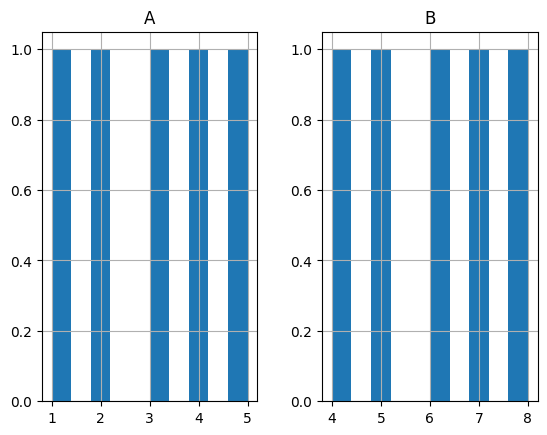

In [167]:
# 165. DataFrame.hist (需要 matplotlib)
%matplotlib inline
df[['A','B']].hist()

<Axes: >

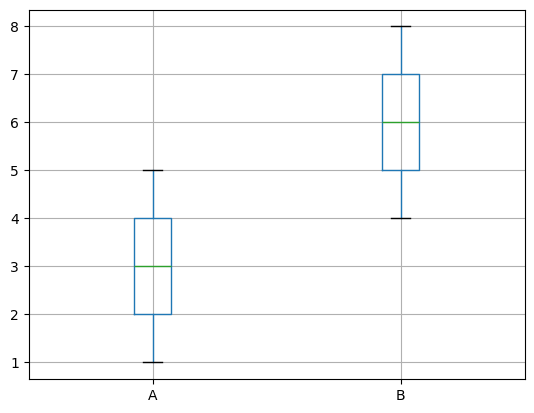

In [168]:
# 166. DataFrame.boxplot
df[['A','B']].boxplot()

<Axes: >

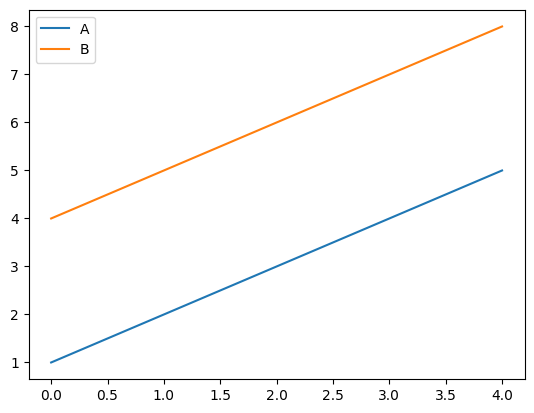

In [169]:
# 167. DataFrame.plot
df[['A','B']].plot()

## 14. 数据转换与因子化

In [170]:
# 168. pd.to_numeric
s_num = pd.Series(['1','2','NaN','4'])
print(pd.to_numeric(s_num, errors='coerce'))

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64


In [171]:
# 169. pd.factorize
labels, uniques = pd.factorize(['apple','banana','apple','pear'])
print(labels, uniques)

[0 1 0 2] ['apple' 'banana' 'pear']


C:\Users\minqliu\AppData\Local\Temp\ipykernel_39108\1803597563.py:2: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  labels, uniques = pd.factorize(['apple','banana','apple','pear'])


In [172]:
# 170. pd.merge_asof
print("pd.merge_asof(left, right, on='time') # 时间序列上的合并")

pd.merge_asof(left, right, on='time') # 时间序列上的合并


In [173]:
# 171. pd.merge_ordered
print("pd.merge_ordered(left, right, on='key') # 有序合并")

pd.merge_ordered(left, right, on='key') # 有序合并


## 15. DataFrame 样式 (Styler)

In [174]:
# 172. DataFrame.style.highlight_max
df.style.highlight_max(axis=0)

,A,B,C,D,A_mean
0,1,4,x,2021-01-01 00:00:00,1.500000
1,2,5,x,2021-01-02 00:00:00,1.500000
2,3,6,y,2021-01-03 00:00:00,3.500000
3,4,7,y,2021-01-04 00:00:00,3.500000
4,5,8,z,2021-01-05 00:00:00,5.000000


In [175]:
# 173. DataFrame.style.highlight_min
df.style.highlight_min(axis=1)

TypeError: '<=' not supported between instances of 'int' and 'str'

In [176]:
# 174. pd.json_normalize
data_json = [
  {"id":1, "info":{"name":"Alice","age":30}},
  {"id":2, "info":{"name":"Bob","age":25}}
]
df_json = pd.json_normalize(data_json, max_level=1)
print(df_json)

   id info.name  info.age
0   1     Alice        30
1   2       Bob        25


In [177]:
# 175. DataFrame.sparse (示例)
df_sparse = pd.DataFrame({'A':[0,0,1],'B':[0,1,0]}).astype(pd.SparseDtype("int", fill_value=0))
print(df_sparse.dtypes, '\n', df_sparse)

A    Sparse[int64, 0]
B    Sparse[int64, 0]
dtype: object 
    A  B
0  0  0
1  0  1
2  1  0


In [178]:
# 176. DataFrame.style.set_caption
df.style.set_caption("My DataFrame")

,A,B,C,D,A_mean
0,1,4,x,2021-01-01 00:00:00,1.500000
1,2,5,x,2021-01-02 00:00:00,1.500000
2,3,6,y,2021-01-03 00:00:00,3.500000
3,4,7,y,2021-01-04 00:00:00,3.500000
4,5,8,z,2021-01-05 00:00:00,5.000000


In [179]:
# 177. DataFrame.style.hide
df.style.hide(axis='index')

A,B,C,D,A_mean
1,4,x,2021-01-01 00:00:00,1.500000
2,5,x,2021-01-02 00:00:00,1.500000
3,6,y,2021-01-03 00:00:00,3.500000
4,7,y,2021-01-04 00:00:00,3.500000
5,8,z,2021-01-05 00:00:00,5.000000


In [180]:
# 178. DataFrame.style.background_gradient
df.style.background_gradient(cmap='YlOrRd')

,A,B,C,D,A_mean
0,1,4,x,2021-01-01 00:00:00,1.500000
1,2,5,x,2021-01-02 00:00:00,1.500000
2,3,6,y,2021-01-03 00:00:00,3.500000
3,4,7,y,2021-01-04 00:00:00,3.500000
4,5,8,z,2021-01-05 00:00:00,5.000000


## 16. 分类数据 (Series.cat)

In [181]:
# 179. Series.cat
s_cat = pd.Series(['a','b','a','c'], dtype='category')
print(s_cat)

0    a
1    b
2    a
3    c
dtype: category
Categories (3, object): ['a', 'b', 'c']


In [182]:
# 180. Series.cat.categories
print(s_cat.cat.categories)

Index(['a', 'b', 'c'], dtype='object')


In [183]:
# 181. Series.cat.remove_unused_categories
s_cat2 = s_cat[s_cat!='c']
print(s_cat2.cat.remove_unused_categories())

0    a
1    b
2    a
dtype: category
Categories (2, object): ['a', 'b']


In [184]:
# 182. Series.cat.reorder_categories
print(s_cat.cat.reorder_categories(['c','a','b']))

0    a
1    b
2    a
3    c
dtype: category
Categories (3, object): ['c', 'a', 'b']


In [185]:
# 183. Series.cat.add_categories
print(s_cat.cat.add_categories(['d']))

0    a
1    b
2    a
3    c
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']


In [186]:
# 184. Series.cat.rename_categories
print(s_cat.cat.rename_categories({'a':'A','b':'B','c':'C'}))

0    A
1    B
2    A
3    C
dtype: category
Categories (3, object): ['A', 'B', 'C']


## 17. 其它常见方法

In [187]:
# 185. DataFrame.index.duplicated
df_idx_dup = pd.DataFrame({'col':[1,2,3]}, index=[0,0,1])
print(df_idx_dup.index.duplicated())

[False  True False]


In [188]:
# 186. DataFrame.index.is_unique
print(df_idx_dup.index.is_unique)

False


In [189]:
# 187. pd.infer_freq
ts_infer = pd.date_range('2021-01-01', periods=4, freq='2D')
print(pd.infer_freq(ts_infer))

2D


In [190]:
# 188. pd.Grouper (groupby 的高级用法)
df_date = df.copy()
df_date['D'] = pd.date_range('2021-01-01', periods=len(df_date))
grouped_grouper = df_date.groupby(pd.Grouper(key='D', freq='2D'))['A'].sum()
print(grouped_grouper)

D
2021-01-01    3
2021-01-03    7
2021-01-05    5
Freq: 2D, Name: A, dtype: int64


In [191]:
# 189. DataFrame.query (再再示例)
print(df.query('A in [2,3]'))

   A  B  C          D  A_mean
1  2  5  x 2021-01-02     1.5
2  3  6  y 2021-01-03     3.5


In [192]:
# 190. DataFrame.eval (又一次示例)
df_eval3 = df.eval("G = A * B")
print(df_eval3)

   A  B  C          D  A_mean   G
0  1  4  x 2021-01-01     1.5   4
1  2  5  x 2021-01-02     1.5  10
2  3  6  y 2021-01-03     3.5  18
3  4  7  y 2021-01-04     3.5  28
4  5  8  z 2021-01-05     5.0  40


In [193]:
# 191. DataFrame.pipe (重复示例)
def add_5(x):
    return x+5

res_pipe2 = df[['A']].pipe(add_5)
print(res_pipe2)

    A
0   6
1   7
2   8
3   9
4  10


In [194]:
# 192. DataFrame.style.background_gradient (再示例)
df.style.background_gradient(cmap='Greens')

,A,B,C,D,A_mean
0,1,4,x,2021-01-01 00:00:00,1.500000
1,2,5,x,2021-01-02 00:00:00,1.500000
2,3,6,y,2021-01-03 00:00:00,3.500000
3,4,7,y,2021-01-04 00:00:00,3.500000
4,5,8,z,2021-01-05 00:00:00,5.000000


## 18. 进一步分类操作

In [195]:
# 193. Series.cat (已示例, 此处再示例)
sc = pd.Series(['x','y','x','z'], dtype='category')
print(sc.cat.codes)

0    0
1    1
2    0
3    2
dtype: int8


In [196]:
# 194. Series.cat.remove_unused_categories (再示例)
sc2 = sc[sc != 'z']
print(sc2.cat.remove_unused_categories())

0    x
1    y
2    x
dtype: category
Categories (2, object): ['x', 'y']


## 19. 其他

In [197]:
# 195. DataFrame.drop_labels (别名, 实际多用 drop)
df_drop2 = df.drop(labels=[0,1])
print(df_drop2)

   A  B  C          D  A_mean
2  3  6  y 2021-01-03     3.5
3  4  7  y 2021-01-04     3.5
4  5  8  z 2021-01-05     5.0


In [198]:
# 196. DataFrame.equals (又示例)
df_test_eq = df.copy()
print(df_test_eq.equals(df))

True


In [199]:
# 197. DataFrame.style (更多设置)
df.style.set_properties(**{'background-color': 'lightblue'})

,A,B,C,D,A_mean
0,1,4,x,2021-01-01 00:00:00,1.500000
1,2,5,x,2021-01-02 00:00:00,1.500000
2,3,6,y,2021-01-03 00:00:00,3.500000
3,4,7,y,2021-01-04 00:00:00,3.500000
4,5,8,z,2021-01-05 00:00:00,5.000000


In [200]:
# 198. Series.dt (再示例)
dts = pd.Series(pd.date_range('2021-01-01', periods=5, freq='D'))
print(dts.dt.weekday, dts.dt.is_month_start)

0    4
1    5
2    6
3    0
4    1
dtype: int32 0     True
1    False
2    False
3    False
4    False
dtype: bool


In [201]:
# 199. Series.cat (再示例)
cat_s = pd.Series(['p','q','p','r'], dtype='category')
print(cat_s.cat.categories)

Index(['p', 'q', 'r'], dtype='object')


In [202]:
# 200. Series.cat.rename_categories (再示例)
cat_s_ren = cat_s.cat.rename_categories({'p':'P','q':'Q','r':'R'})
print(cat_s_ren)

0    P
1    Q
2    P
3    R
dtype: category
Categories (3, object): ['P', 'Q', 'R']


----
**以上即约 200 个 Pandas 常用方法/函数示例**。

- 某些函数有多次演示、或仅做用法展示；
- 复杂场景请参考官方文档和更多实践案例。

祝学习愉快！